# T3 - Atividade 1 e 2

Aluna: Fernanda Ferreira RA:163676

Curso: IA369Y

Professora: Paula Dornhofer Paro Costa

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import librosa
import scipy.io.wavfile
import IPython.lib.display as display

## Atividade 1

## Detecção de Pitch (curso do Tiago)

A autocorrelação é a convolução entre o sinal e ele mesmo. Entretanto, se passarmos para o domínio da frequência simplificaremos os calculos através da multiplicação.

C:\Users\Fernanda\Anaconda2\lib\site-packages\scipy\io\wavfile.py:221: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


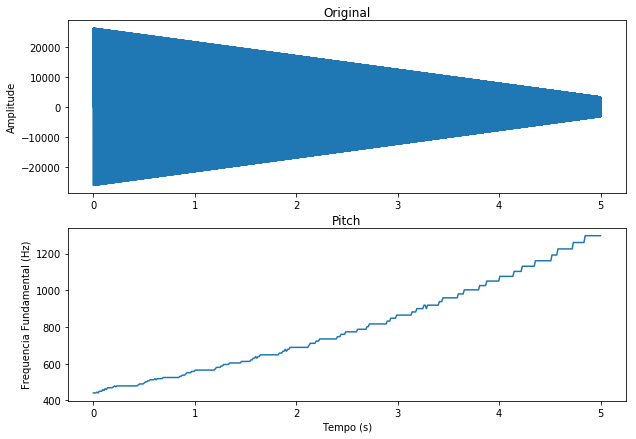

In [7]:
def t0_acc(x):
    """Retorna o periodo fundamental de x, em amostras"""
    X = np.abs(np.fft.fft(x))
    r = np.real(np.fft.ifft(X*X))
    r2 = np.zeros(len(r)/2) #teorema de nyquist
    for n in xrange(len(r2)):
        r2[n] = r[n]-r[n/2]
    r2 *= np.linspace(1, 0, len(r2))
    t0 = np.argmax(r2)
    return t0

fname = 'chirp.wav'
rate, data = scipy.io.wavfile.read(fname)
data = data.astype(np.float)

t0 = 0
window = 1024
step = 512
f0 = []

while t0+window < len(data):
    per_fun = t0_acc(data[t0:t0+window])
    if per_fun > 2:
        per_fun /= float(rate)
        f0.append(1./per_fun)
    else:
        f0.append(0)
    t0 += step

t = np.linspace(0, len(data)/rate, len(f0))
t2 = np.linspace(0, len(data)/rate, len(data))

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(t2, data)
ax[1].plot(t, f0)
ax[0].set_title('Original')
ax[1].set_title('Pitch')
ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Frequencia Fundamental (Hz)')
ax[1].set_xlabel('Tempo (s)')
plt.show()

display.Audio(fname)

## Detecção de Pitch (Librosa)

In [8]:
pitches, magnitudes = librosa.core.piptrack(data, rate, S=None, n_fft=1024, hop_length=512, fmin=0.0, fmax=2000.0, threshold=0.1)

#pitches = (f, t) - freq bins e tempo
#magnitudes = (f, t)  - mag freq e tempo

#Os pitches não podem ser plotados, pois existem vários valores para o pitch. Por isso, vamos selecionar o máximo valor.

def extract_max(pitches, shape):
    new_pitches = []
    for i in range(0, shape[1]):
        new_pitches.append(np.max(pitches[:,i]))
    return new_pitches

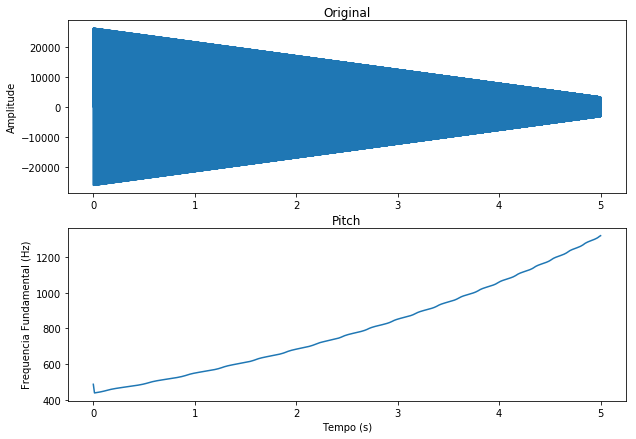

In [9]:
pitch_track = extract_max(pitches, pitches.shape)
t3 = np.linspace(0, len(data)/rate, len(pitch_track))

fig2, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(t2, data)
ax[1].plot(t3, pitch_track)
ax[0].set_title('Original')
ax[1].set_title('Pitch')
ax[0].set_ylabel('Amplitude')
ax[1].set_ylabel('Frequencia Fundamental (Hz)')
ax[1].set_xlabel('Tempo (s)')
plt.show()

Após o teste da função do Librosa, agora vamos implementar nos áudios, e tentar obter as características das emoções.

In [10]:
anger1, sr_a1 = librosa.load('Audios_SER_Ekman/I1_Balanced_Anger_Mono.wav')
sad1, sr_s1 = librosa.load('Audios_SER_Ekman/I1_Balanced_Sad_Mono.wav')
disgust1, sr_d1 = librosa.load('Audios_SER_Ekman/I1_Balanced_Disgust_Mono.wav')
happy1, sr_h1 = librosa.load('Audios_SER_Ekman/I1_Balanced_Happy_Mono.wav')
fear1, sr_f1 = librosa.load('Audios_SER_Ekman/I1_Balanced_Fear_Mono.wav')
surprise1, sr_su1 = librosa.load('Audios_SER_Ekman/I1_Balanced_Surprise_Mono.wav')

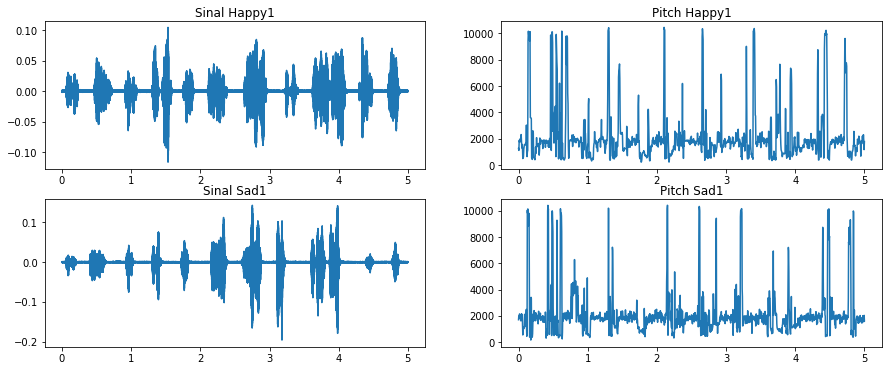

In [13]:
def Pitch(audio, fs):
    pit, mag = librosa.core.piptrack(audio, fs, S=None, n_fft=1024, hop_length=512, fmin=0.0, fmax=15000.0, threshold=0.1)
    pitch_max = extract_max(pit, pit.shape)
    t_pit = np.linspace(0, len(data)/rate, len(pitch_max))
    return t_pit, pitch_max

#t_a1, a1 = Pitch(anger1, sr_a1)
t_s1, s1 = Pitch(sad1, sr_s1)
t_h1, h1 = Pitch(happy1, sr_h1)

th1 = np.linspace(0, len(data)/rate, len(happy1))
ts1 = np.linspace(0, len(data)/rate, len(sad1))

fig, ax = plt.subplots(2, 2, figsize=(15, 6))
#plt.plot(t_a1, a1)
#plt.title('Pitch Anger1')
#plt.show()
ax[0][0].plot(th1, happy1)
ax[0][0].set_title('Sinal Happy1')
ax[0][1].plot(t_h1, h1)
ax[0][1].set_title('Pitch Happy1')
ax[1][0].plot(ts1, sad1)
ax[1][0].set_title('Sinal Sad1')
ax[1][1].plot(t_s1, s1)
ax[1][1].set_title('Pitch Sad1')
plt.show()

Podemos verificar que os pitch de determinadas emoções são diferentes, e podem ser classificados para diferentes emoções.

## Atividade 2

Nessa atividade foi utilizados o Pitch e o MFCC para extrair as características dos áudios.

### Pitch

Para facilitar a visualização do pitch, foi utilizado apenas a última palavra dita (chuva), nas emoções feliz e triste.

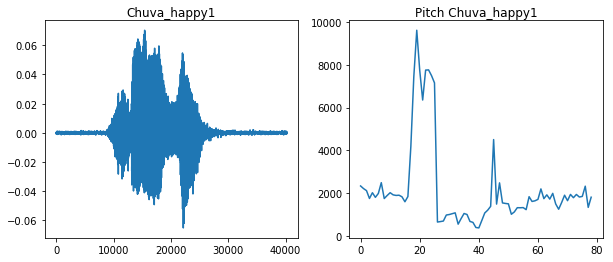

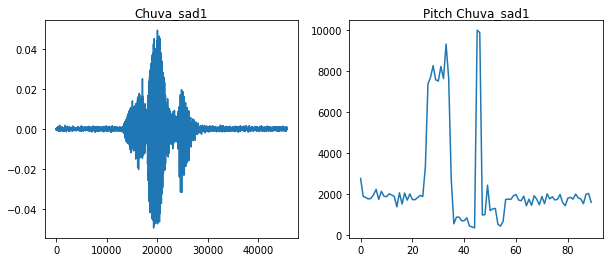

In [14]:
chuva_h1 = happy1[500000:]
chuva_s1 = sad1[660000:]

t_ch1, ch1 = Pitch(chuva_h1, sr_h1)
t_cs1, cs1 = Pitch(chuva_s1, sr_s1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(happy1[500000:])
plt.title('Chuva_happy1')
plt.subplot(1, 2, 2)
plt.plot(ch1)
plt.title('Pitch Chuva_happy1')
plt.show()

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(sad1[660000:])
plt.title('Chuva_sad1')
plt.subplot(1, 2, 2)
plt.plot(cs1)
plt.title('Pitch Chuva_sad1')
plt.show()

### MFCC

O MFCC é capaz de calcular as energias dos sinais de audios e reduzir a complexidade computacional dos sinais de áudios. O MFCC é composto por vários processos até obter os coeficientes, veja o diagrama abaixo:

<img src="diagram_MFCC.PNG">

No MFCC o sinal é filtrado para eliminar componentes de alta frequência, depois o sinal é divido em frames e sobreposição, normalmente janelas de 20ms e 10ms respectivamente. Em seguida cada frame é multiplicado pela janela de Hamming, em geral, e para cada janela é calculada a FFT. Após isso, o sinal no domínio da frequência é espaçado em escalas Mel e computada a DCT-II, a qual retorna os coeficientes mel-ceptrais do sinal de áudio.

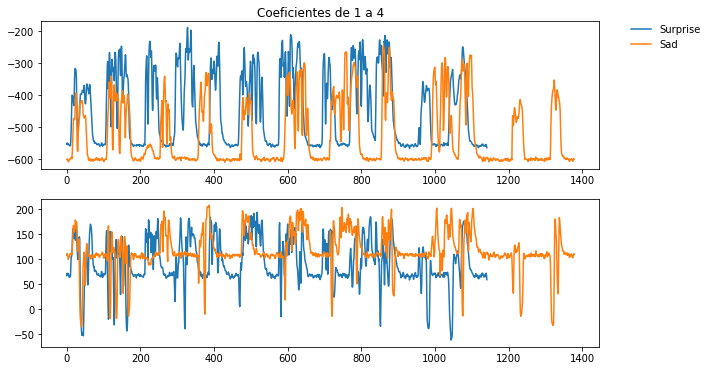

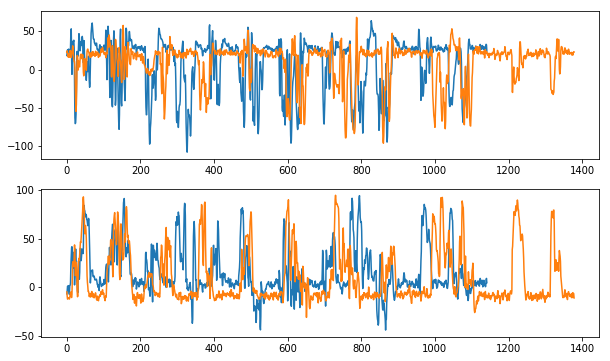

In [18]:
coeff = librosa.feature.mfcc(surprise1, sr_su1, S=None, n_mfcc=4, dct_type=2, norm='ortho')
coeff2 = librosa.feature.mfcc(sad1, sr_s1, S=None, n_mfcc=4, dct_type=2, norm='ortho')

plt.figure(1, figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(coeff[0], label='Surprise')
plt.plot(coeff2[0], label='Sad')
plt.title('Coeficientes de 1 a 4')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#plt.show()
plt.subplot(2, 1, 2)
plt.plot(coeff[1])
plt.plot(coeff2[1])
plt.show()

plt.figure(2, figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(coeff[2])
plt.plot(coeff2[2])
#plt.show()
plt.subplot(2, 1, 2)
plt.plot(coeff[3])
plt.plot(coeff2[3])
plt.show()

Podemos concluir que é possível, identificar as emoções através do pitch e do MFCC, pois as características e coeficientes das emoções são diferentes e por isso é possível classificar as emoções.

## Atividade 5

In [7]:
%matplotlib inline
from skimage.feature import hog
from skimage import data, exposure
from PIL import Image
import numpy as np
import glob
import matplotlib.image as mpimg

In [1]:
imagens = glob.glob('faces/cinco/*.png')
#print imgs

labels = list(open('labels.txt', 'r'))

hogs_image = []
fds = []

for file in imagens:
    imagem = np.array(Image.open(file).convert('L'))
    fd, hog_image = hog(imagem, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise=True, normalise=True)
    fds.append(fd)
    hogs_image.append(np.concatenate(hog_image))


#hog_image_rescaled = exposure.rescale_intensity(hogs_image, in_range=(0, 10))

#from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
#X_train, X_test, y_train, y_test = train_test_split(hogs_image, labels, test_size=0.3,random_state=109)

from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
#clf.fit(fds, labels)

clf.fit(hogs_image, labels)

#Predict the response for test dataset
y_pred = clf.predict(hogs_image)

from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(labels, y_pred))

('Accuracy:', 1.0)


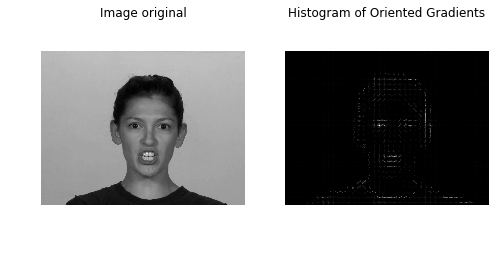

In [8]:
import matplotlib.pyplot as plt

image_test = np.array(Image.open('Faces/anger/Em22_Fala1_0085_640x480.png').convert('L'))

#print image.shape

fd, hog_image_1 = hog(image_test, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualise=True, normalise=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image_test, cmap=plt.cm.gray)
ax1.set_title('Image original')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image_1, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

As características das imagens foram extraídas utilizando as texturas, as quais foram extraídas através da técnica de histograma de gradientes (HOG). Essa técnica é composta por filtros de sobel, o qual extrai as bordas da imagem e depois identifica as direções da borda da imagem através do gradiente.

O algoritmo de classificação apresentou acurácia de 100%, porque foi utilizado a mesma base para treino e teste. Eu utilizei uma base menor, pois não consegui utilizar os dados fornecidos de maneira correta.

## Referências

- https://github.com/tiagoft/curso_audio/blob/master/pitch.ipynb

- https://www.kaggle.com/jerrypeng/dsp-tutorial-3-demos-for-speech-processing